In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error 

In [2]:
df= pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [80]:
x = df[['T2']]
y= df[['T6']]


<AxesSubplot:xlabel='T2', ylabel='T6'>

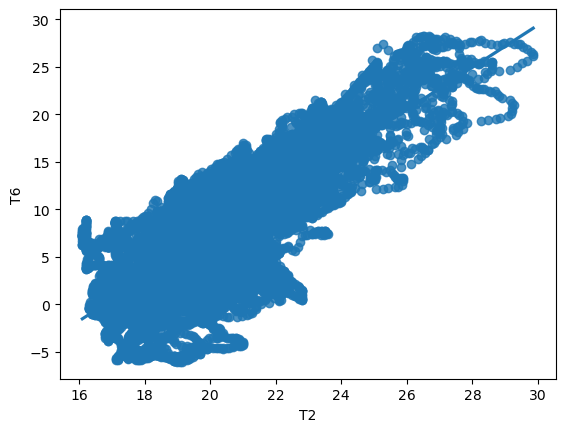

In [4]:
sns.regplot(x='T2', y='T6', data=df)

# 17

# From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the Root Mean Squared error in three D.P?

In [81]:
x_train_slm, x_test_slm, y_train_slm, y_test_slm = train_test_split(x, y, test_size=0.3, random_state=42)

In [82]:
slm = LinearRegression()
slm.fit(x_train_slm,y_train_slm)

LinearRegression()

In [84]:
slm_predicted_values = slm.predict(x_test_slm)
rmse_slm = round(np.sqrt(mean_squared_error(y_test_slm, slm_predicted_values)),3)
rmse_slm


3.63

# 18

In [7]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
X = df.drop(['date','lights', 'Appliances'], axis=1)
y = df['Appliances']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
scaler = MinMaxScaler()

x_train_scaled_df = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)

x_test_scaled_df = pd.DataFrame(scaler.transform(x_test), columns=x_train.columns)

 

In [15]:
x_train_scaled_df.shape,x_train.shape, x_test_scaled_df.shape,x_test.shape

((13814, 26), (13814, 26), (5921, 26), (5921, 26))

In [13]:
x_train.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
9129,21.50,35.626667,17.790000,40.59,21.700000,35.26,20.39,33.863333,19.600000,40.425,...,19.463333,38.260000,0.250000,766.400000,83.000000,2.000000,65.000000,-2.350000,36.226675,36.226675
2453,19.50,44.560000,18.700000,44.29,19.823333,44.50,18.10,43.860000,17.200000,52.000,...,17.200000,46.163333,3.166667,765.266667,85.333333,2.000000,40.000000,0.966667,43.199767,43.199767
9152,20.79,35.400000,16.890000,42.03,21.700000,36.00,19.70,33.200000,19.290000,39.900,...,19.390000,39.067500,-1.566667,766.000000,89.333333,1.333333,60.666667,-3.100000,24.976055,24.976055
12694,22.10,43.260000,19.963333,45.50,23.390000,39.79,21.10,39.060000,20.660000,58.054,...,20.290000,37.400000,8.833333,753.366667,81.000000,1.666667,26.000000,5.733333,16.161125,16.161125
16952,24.70,42.360000,29.856667,31.79,26.171429,38.59,25.10,39.760000,23.166667,60.130,...,23.100000,44.466667,21.433333,752.100000,51.000000,2.000000,40.000000,10.800000,17.055346,17.055346


In [64]:
linear_model  =LinearRegression()
linear_model.fit(x_train_scaled_df, y_train)

LinearRegression()

In [66]:
predicted_values = linear_model.predict(x_train_scaled_df)

In [67]:
predicted_values

array([ 49.97775425, 100.31632974,  40.12912536, ...,  59.47229745,
       103.23225103,  88.1415215 ])

# What is the Mean Absolute Error (in three decimal places) for the  training set?

In [68]:
mae_train = round(mean_absolute_error(y_train, predicted_values),3)
mae_train

53.742

In [69]:
rmse_train = round(np.sqrt(mean_squared_error(y_train, predicted_values)),3)
rmse_train


95.216

# What is the Mean Absolute Error (in three decimal places) for test set?

In [36]:
predicted_values_test = linear_model.predict(x_test_scaled_df)

In [44]:
mae_test =round( mean_absolute_error(y_test, predicted_values_test),3)
mae_test

53.643

# What is the Root Mean Squared Error (in three decimal places) for test set?

In [39]:
rmse_test = round(np.sqrt(mean_squared_error(y_test, predicted_values_test)),2)
rmse_test


93.64

# Train a ridge regression model with default parameters. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [46]:
ridge_model = Ridge()
ridge_model.fit(x_train_scaled_df, y_train)

Ridge()

In [47]:
rigde_predicted_value = ridge_model.predict(x_test_scaled_df)

In [48]:
ridge_rmse_test = round(np.sqrt(mean_squared_error(y_test, rigde_predicted_value)),2)
ridge_rmse_test

93.71

# Train a lasso regression model with default value and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [72]:
lasso_model = Lasso()
lasso_model.fit(x_train_scaled_df, y_train)

Lasso()

In [73]:
weights = pd.Series(lasso_model.coef_, x_train.columns).sort_values()
weights_df = pd.DataFrame(weights).reset_index()
weights_df.columns = ['Features', 'Weight']
weights_df['Weight'].round(3)

weights_df

,Features,Weight
0,RH_out,-50.293976
1,RH_8,-26.102888
2,T1,0.000000
3,Tdewpoint,-0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,-0.000000
9,T8,0.000000


In [74]:
lasso_predicted_value = lasso_model.predict(x_test_scaled_df)
lasso_rmse_test = round(np.sqrt(mean_squared_error(y_test, lasso_predicted_value)),3)
lasso_rmse_test

99.424